## Data Preparation and Analysis

### 1. Dataset Loading
- Import necessary libraries
- Load the dataset

### 2. Data Cleaning
- Remove redundant columns
- Rename columns for clarity
- Eliminate duplicate entries
- Clean individual columns
- Handle missing values (NaN)

### 3. Data Transformation
- Perform necessary data transformations

### 4. Regression Analysis
- Linear Regression
- Decision Tree Regression
- Random Forest Regression

### 5. Data Visualization
Explore relationships between features using plots:
- Online delivery availability
- Table booking options
- Table booking rate vs. overall rating
- Best locations for restaurants
- Location and rating correlation
- Restaurant types
- Service types
- Cost analysis
- Restaurant distribution by location
- Popular restaurant chains in Bengaluru

## Project Overview

This analysis aims to understand the factors influencing restaurant establishments in Bengaluru. It examines various aspects such as location, type of cuisine, services offered, and their impact on restaurant ratings and popularity. The insights gained will help in understanding the local restaurant market and consumer preferences.

Note: The dataset for this analysis is available for download at [https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants/data](http://)

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [2]:
#read the data
zomato=pd.read_csv("/kaggle/input/zomato-bangalore-restaurants/zomato.csv")

In [4]:
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [3]:
# delete useless columns

# Dropping the column "dish_liked", "phone", "url" 
zomato.drop(['url','dish_liked','phone'],axis=1, inplace=True) 

In [4]:
# check for duplicates
zomato.duplicated().sum()

43

In [5]:
# Remove the duplicates
zomato.drop_duplicates(inplace=True)

In [8]:
# check for NaN 
zomato.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [6]:
# drop the Nan values
zomato.dropna(how='any',inplace=True)

In [13]:
zomato.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43499 n

In [14]:
# column names 
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
# rename columns
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [8]:
#  format the cost column
zomato['cost'] = zomato['cost'].astype(str) # change type of the cost to string
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.')) # using lambda function to replace ',' from cost
zomato['cost'] = zomato['cost'].astype(float) # chage tpye to Float


In [17]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [18]:
# unique values in rate column
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
# remove '/5' from rate column
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')

In [34]:
zomato.rate.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [10]:
# encode  input variables
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'cost', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())

<Axes: >

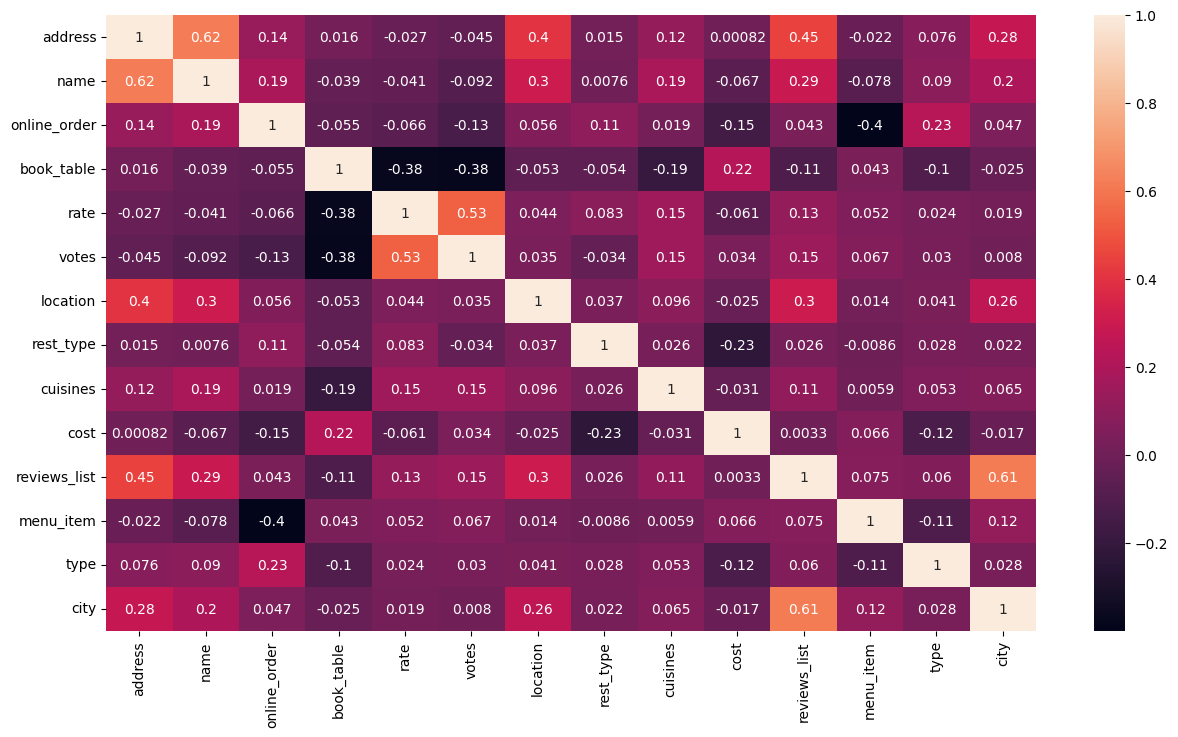

In [38]:
# check for correlation
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

correlation is high for name and address - 0.62 

## Regression Analysis
 - Splitting the Dataset

In [11]:
# x,y
x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = zomato_en['rate']

In [12]:
# split dta into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

16950    3.9
767      3.7
6750     4.0
9471     3.8
25162    3.7
Name: rate, dtype: float64

### Linear Regression

In [41]:
# train linear regression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.2736233722103949

### Decision Tree

In [43]:
# train a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
r2_score(y_test,y_predict)

0.8557807568246583

In [44]:
# train Random Forest regression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
r2_score(y_test,y_predict)

0.8774282743423502

In [45]:
### Extra tree regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)
r2_score(y_test,y_predict)

0.9388344620891936

## Data Visualization


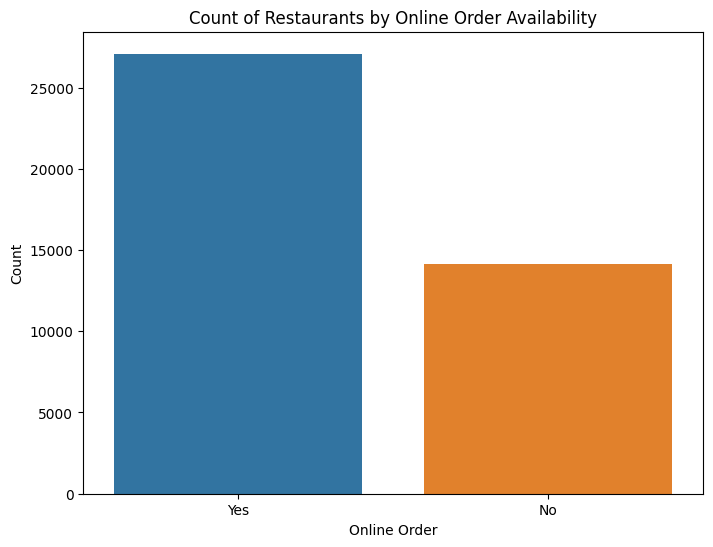

In [47]:
# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='online_order', data=zomato)

# Add labels and title
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.title('Count of Restaurants by Online Order Availability')

# Show the plot
plt.show()

### restaurants which has table booking option

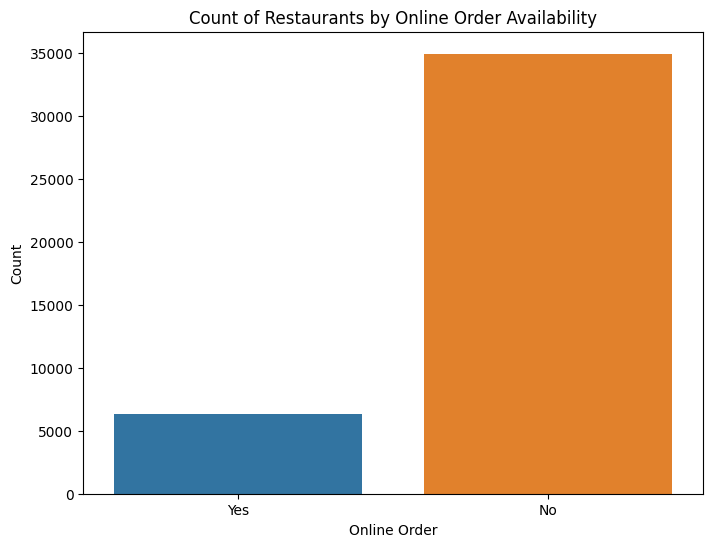

In [48]:
# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='book_table', data=zomato)

# Add labels and title
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.title('Count of Restaurants by Online Order Availability')

# Show the plot
plt.show()

Table booking Rate vs Rate

/tmp/ipykernel_36/1520268821.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


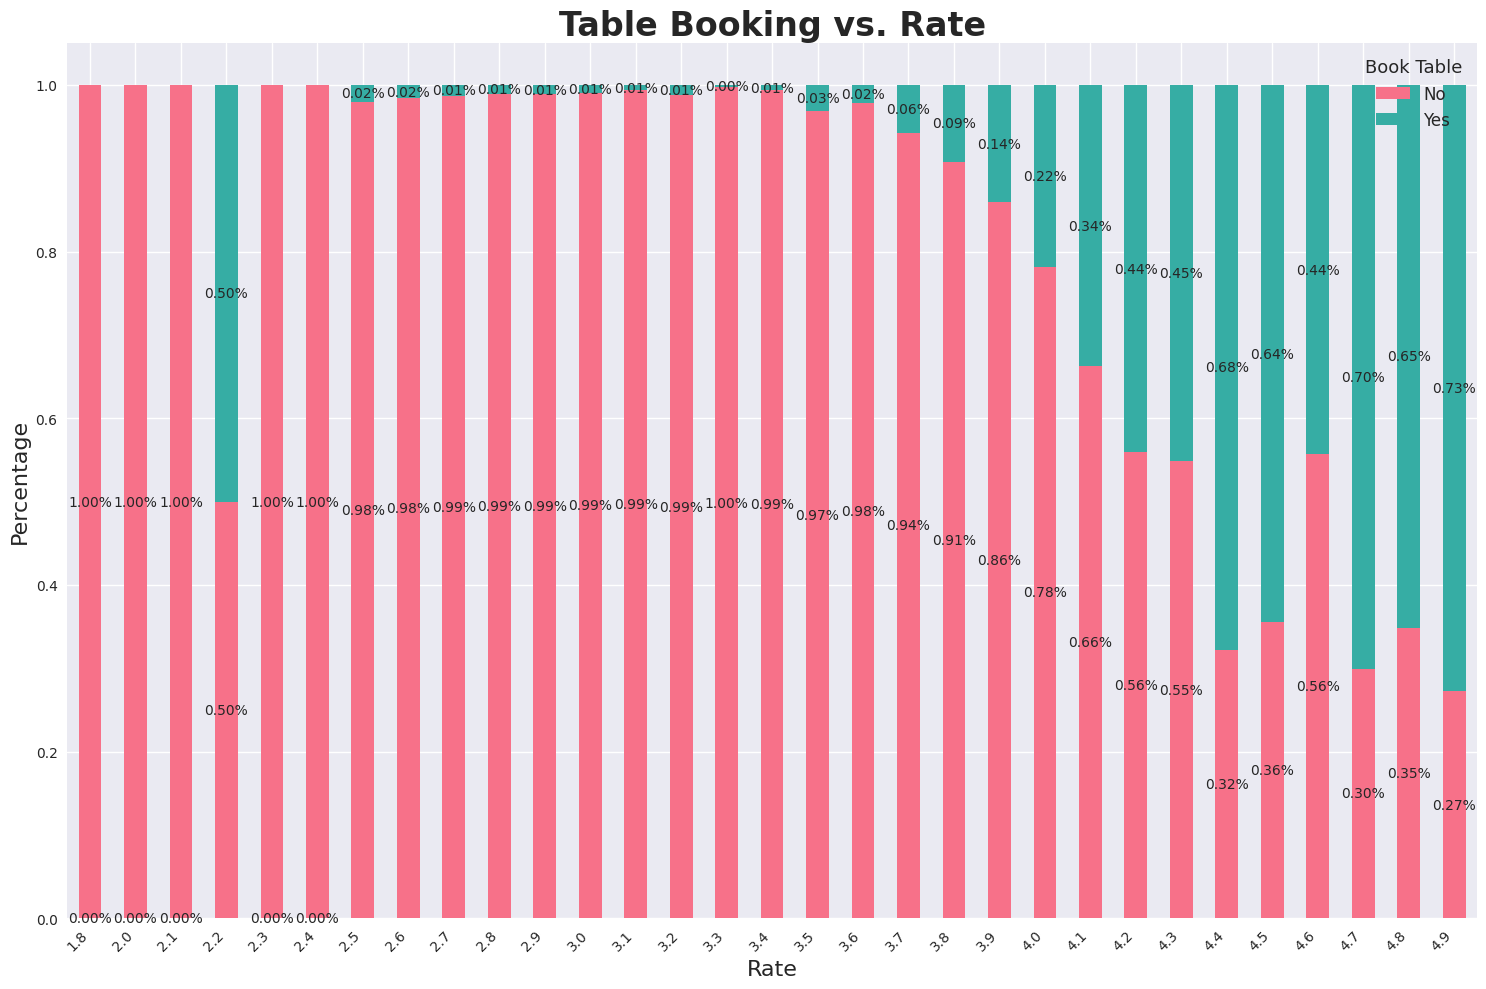

In [49]:
# Set the style for better-looking plots
plt.style.use('seaborn')

# Create the cross-tabulation
Y = pd.crosstab(zomato['rate'], zomato['book_table'])

# Calculate percentages
Y_percentage = Y.div(Y.sum(1), axis=0)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the stacked bar chart
Y_percentage.plot(kind='bar', stacked=True, ax=ax, 
                  color=sns.color_palette("husl", 2))

# Customize the plot
plt.title('Table Booking vs. Rate', fontweight='bold', fontsize=24)
plt.xlabel('Rate', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.legend(title='Book Table', title_fontsize='13', fontsize='12', loc='upper right')
plt.xticks(rotation=45, ha='right')

# Add percentage labels on the bars
for c in ax.containers:
    ax.bar_label(c, fmt='%.2f%%', label_type='center')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### location

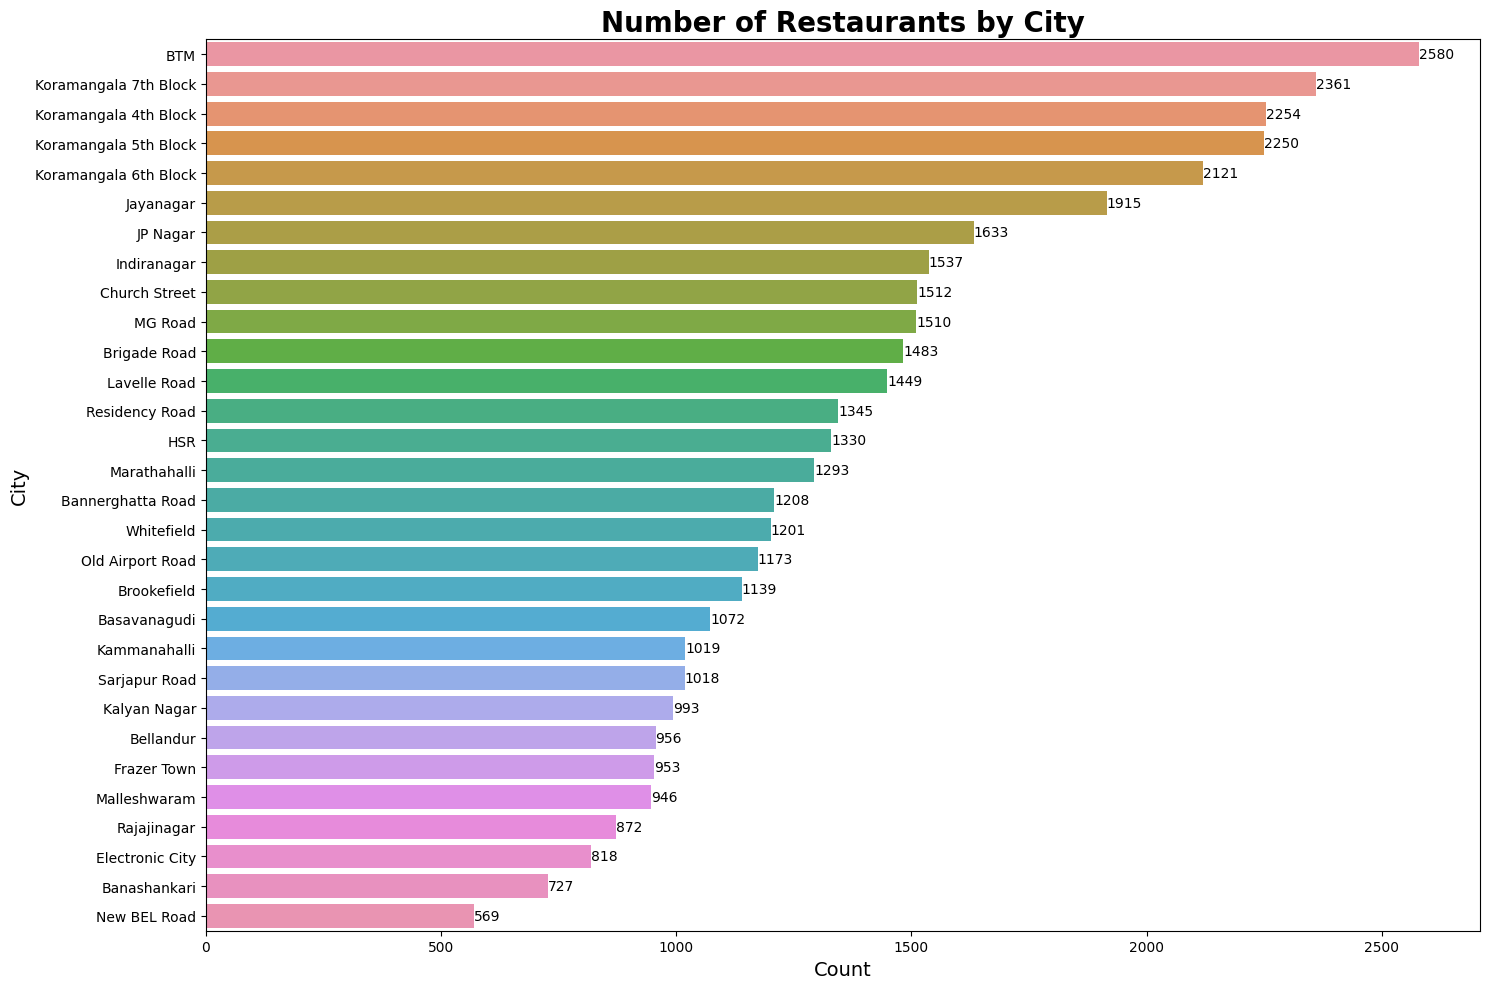

In [15]:
plt.figure(figsize=(15, 10))

# Create the count plot
ax = sns.countplot(y='city', data=zomato, 
                   order=zomato['city'].value_counts().index)

# Customize the plot
plt.title('Number of Restaurants by City', fontsize=20, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('City', fontsize=14)

# Add count labels to the bars
for i in ax.containers:
    ax.bar_label(i)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Location and Rating

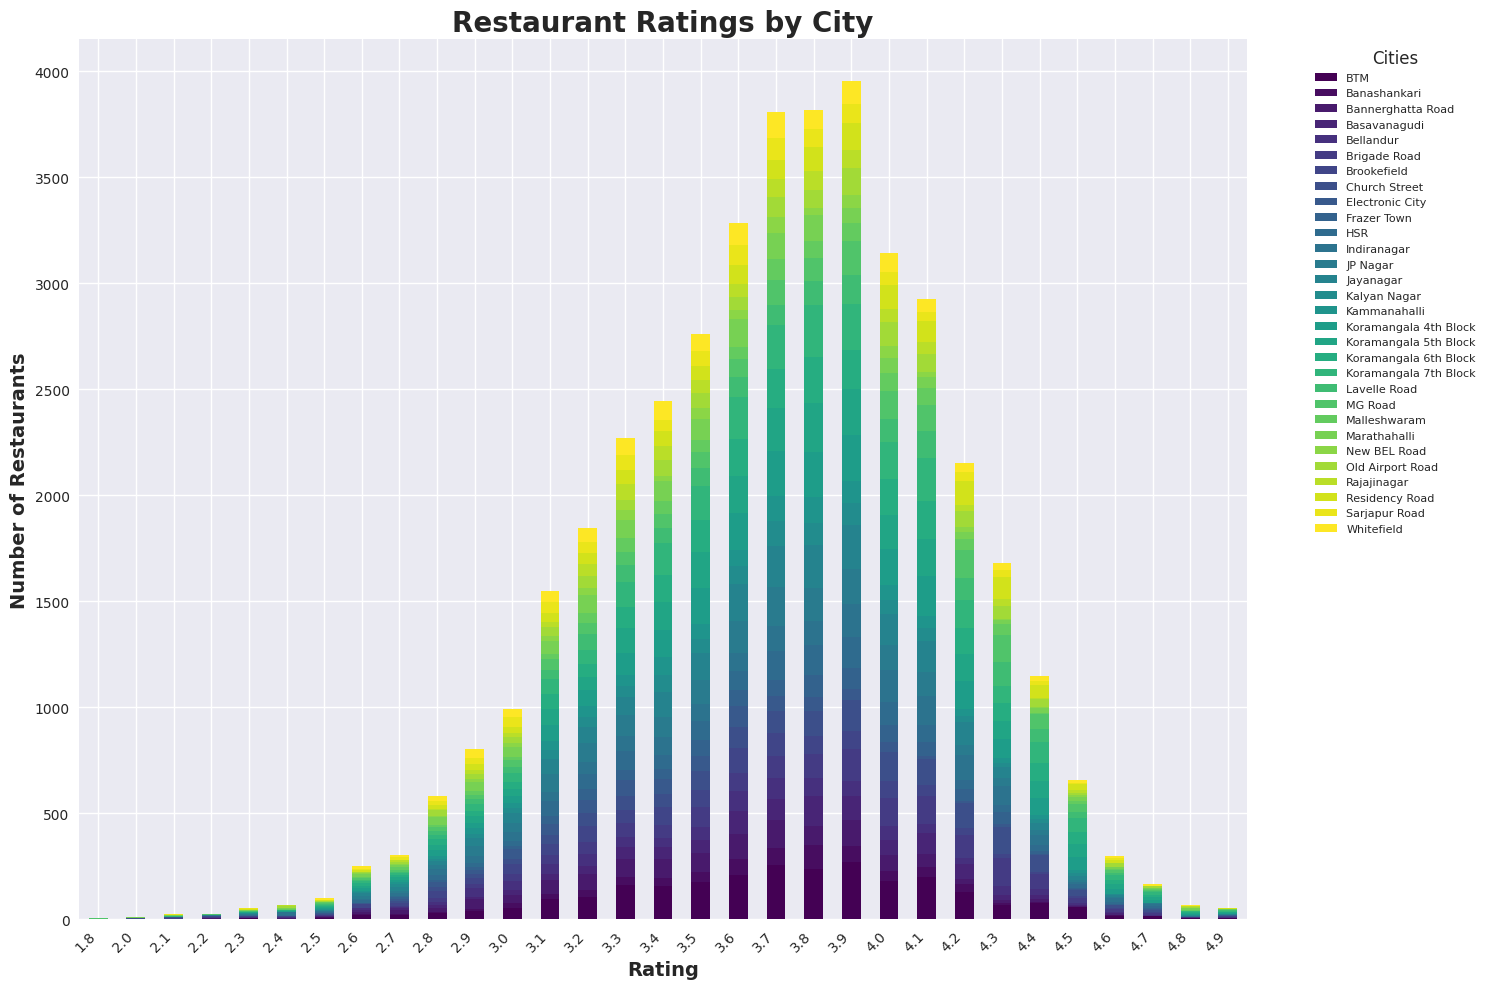

In [26]:
# Create the cross-tabulation
loc_plt = pd.crosstab(zomato['rate'], zomato['city'])

fig, ax = plt.subplots(figsize=(15, 10))


# Create the stacked bar plot
loc_plt.plot(kind='bar', stacked=True, colormap='viridis',ax= ax)

# Customize the plot
plt.title('Restaurant Ratings by City', fontsize=20, fontweight='bold')
plt.xlabel('Rating', fontsize=14, fontweight='bold')
plt.ylabel('Number of Restaurants', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add a legend with a smaller font size and move it outside the plot
plt.legend(title='Cities', title_fontsize=12, fontsize=8, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and save the figure
plt.tight_layout()

plt.show()

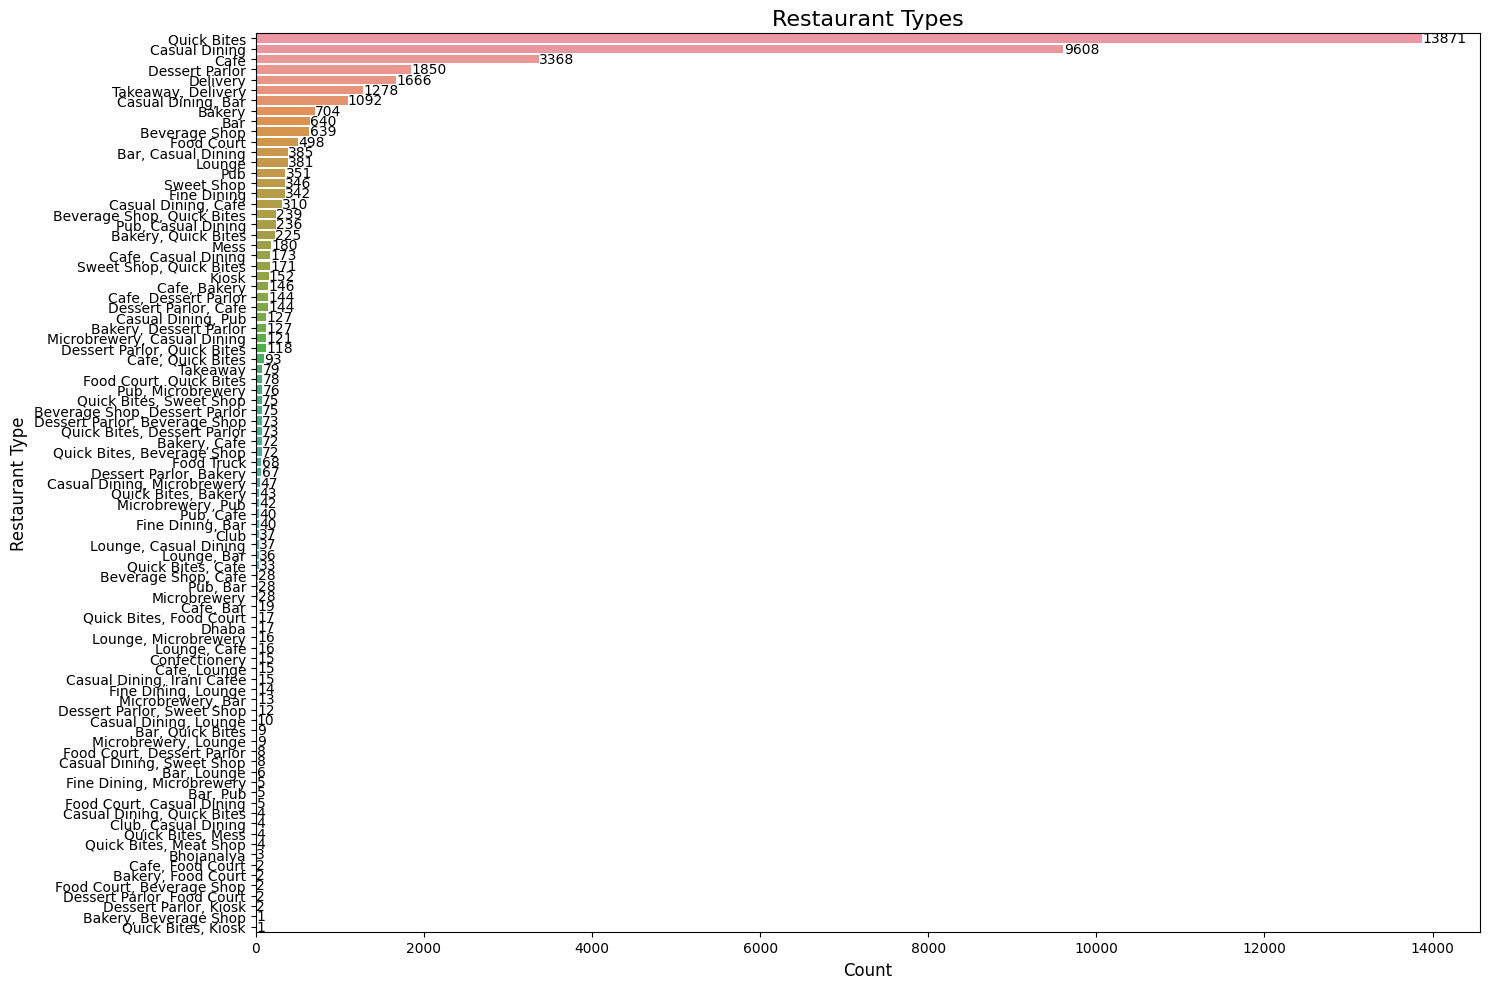

In [13]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(data=zomato, y='rest_type', order=zomato['rest_type'].value_counts().index)

# Customize the plot
plt.title('Restaurant Types', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Restaurant Type', fontsize=12)

# Add count labels
for i, v in enumerate(zomato['rest_type'].value_counts()):
    ax.text(v + 3, i, str(v), va='center')

# Adjust layout and save
plt.tight_layout()
plt.show()

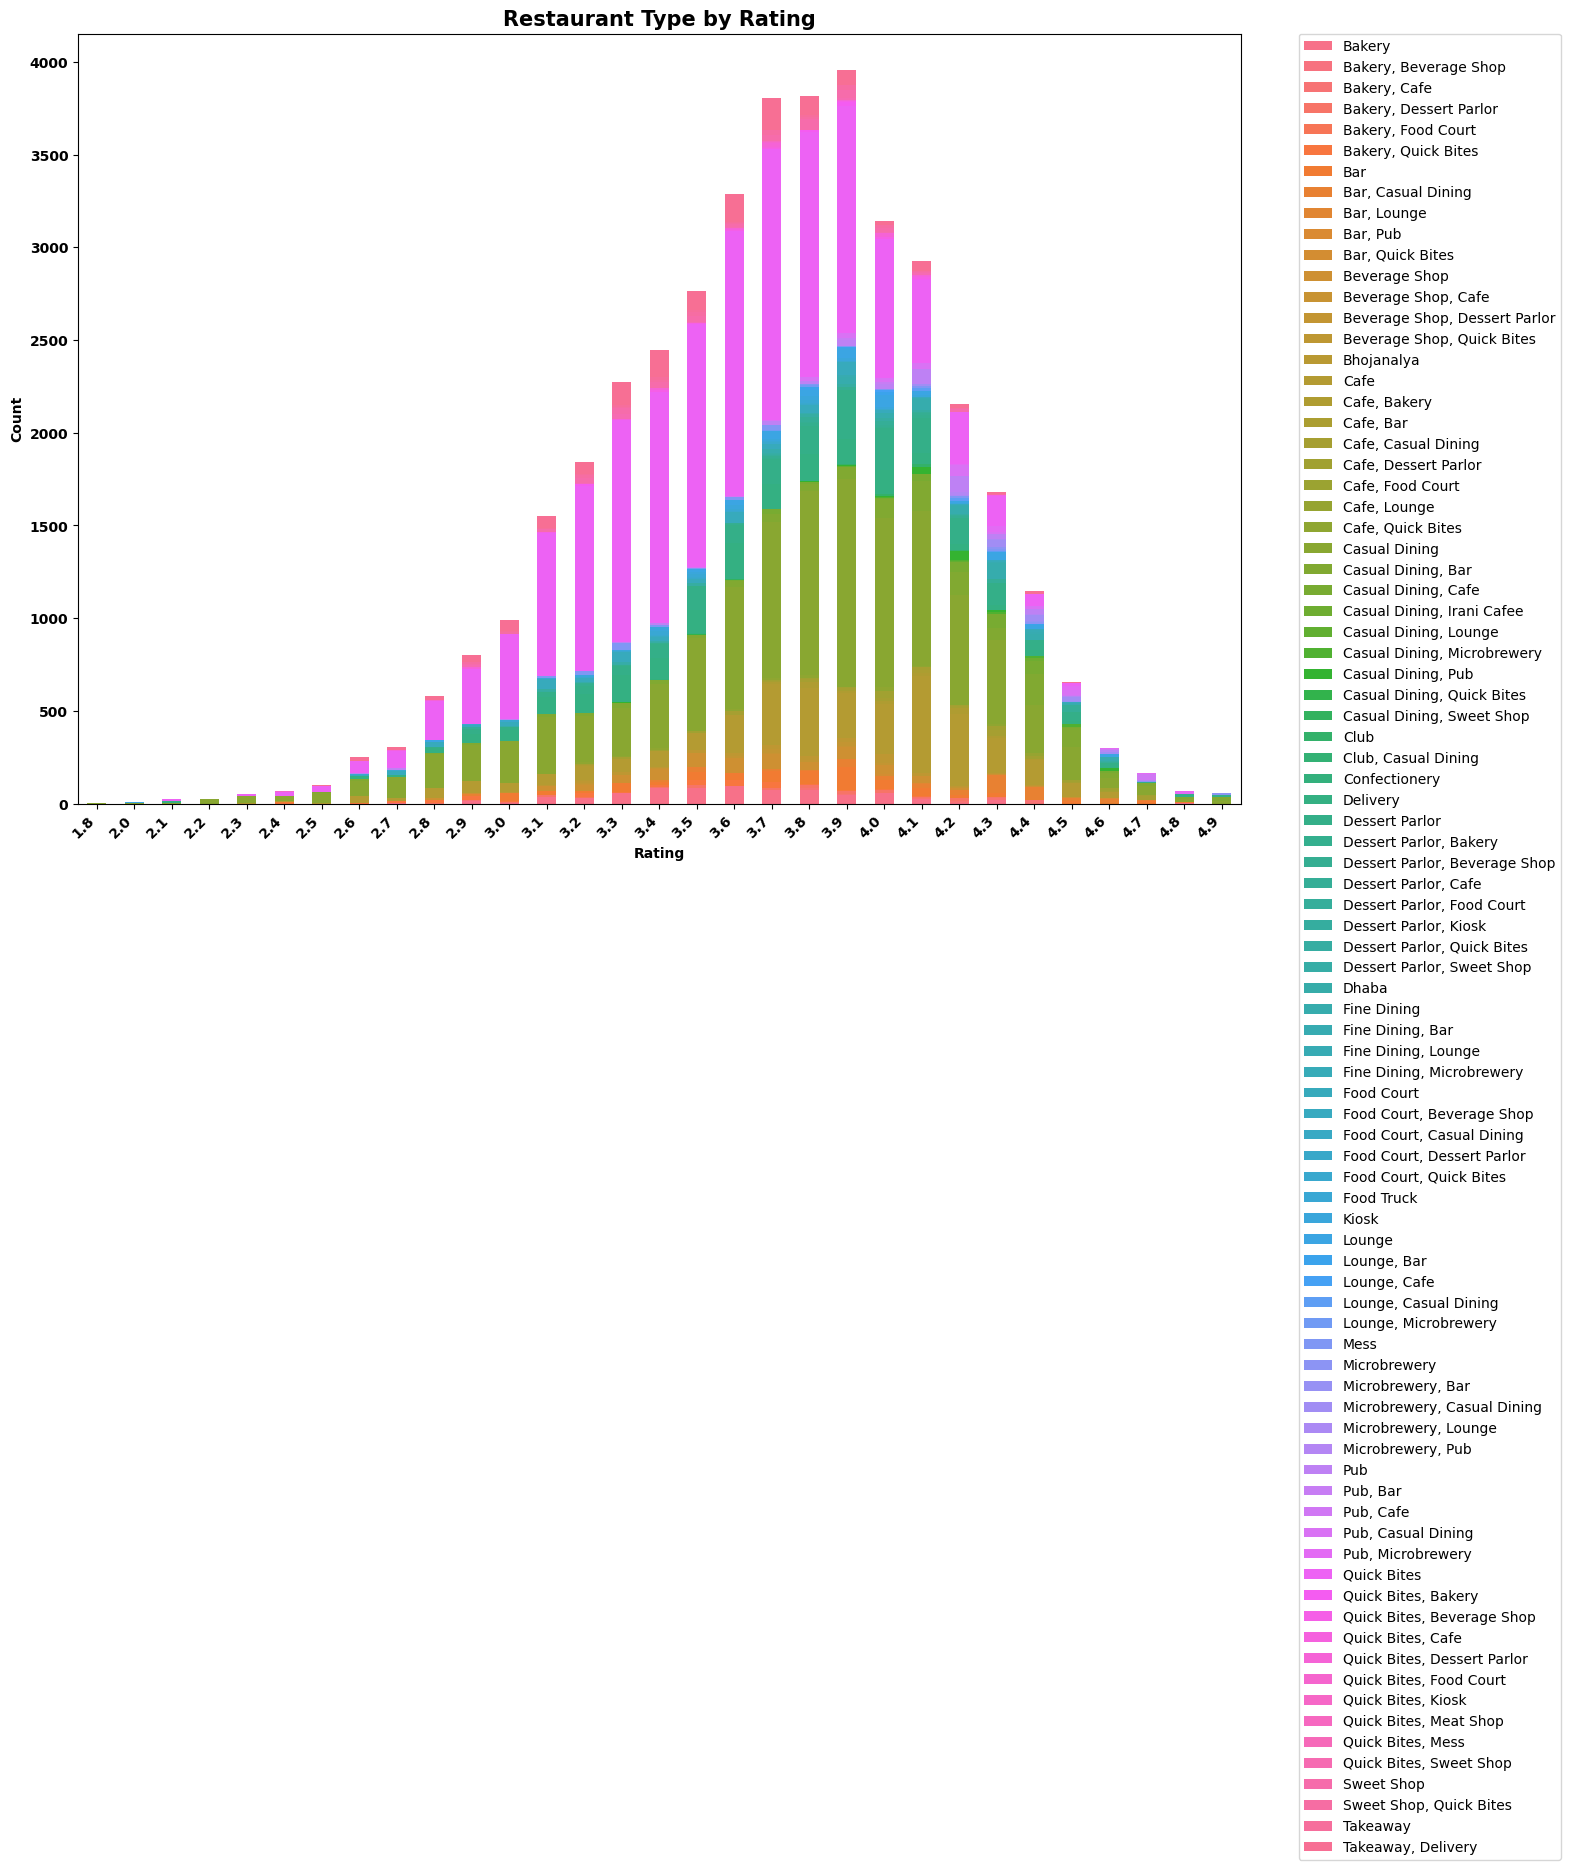

In [15]:
loc_plt = pd.crosstab(zomato['rate'], zomato['rest_type'])

fig, ax = plt.subplots(figsize=(15, 10))

colors = sns.color_palette("husl", n_colors=len(loc_plt.columns))
loc_plt.plot(kind='bar', stacked=True, color=colors,ax= ax)

plt.title('Restaurant Type by Rating', fontsize=15, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.xlabel('Rating', fontsize=10, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

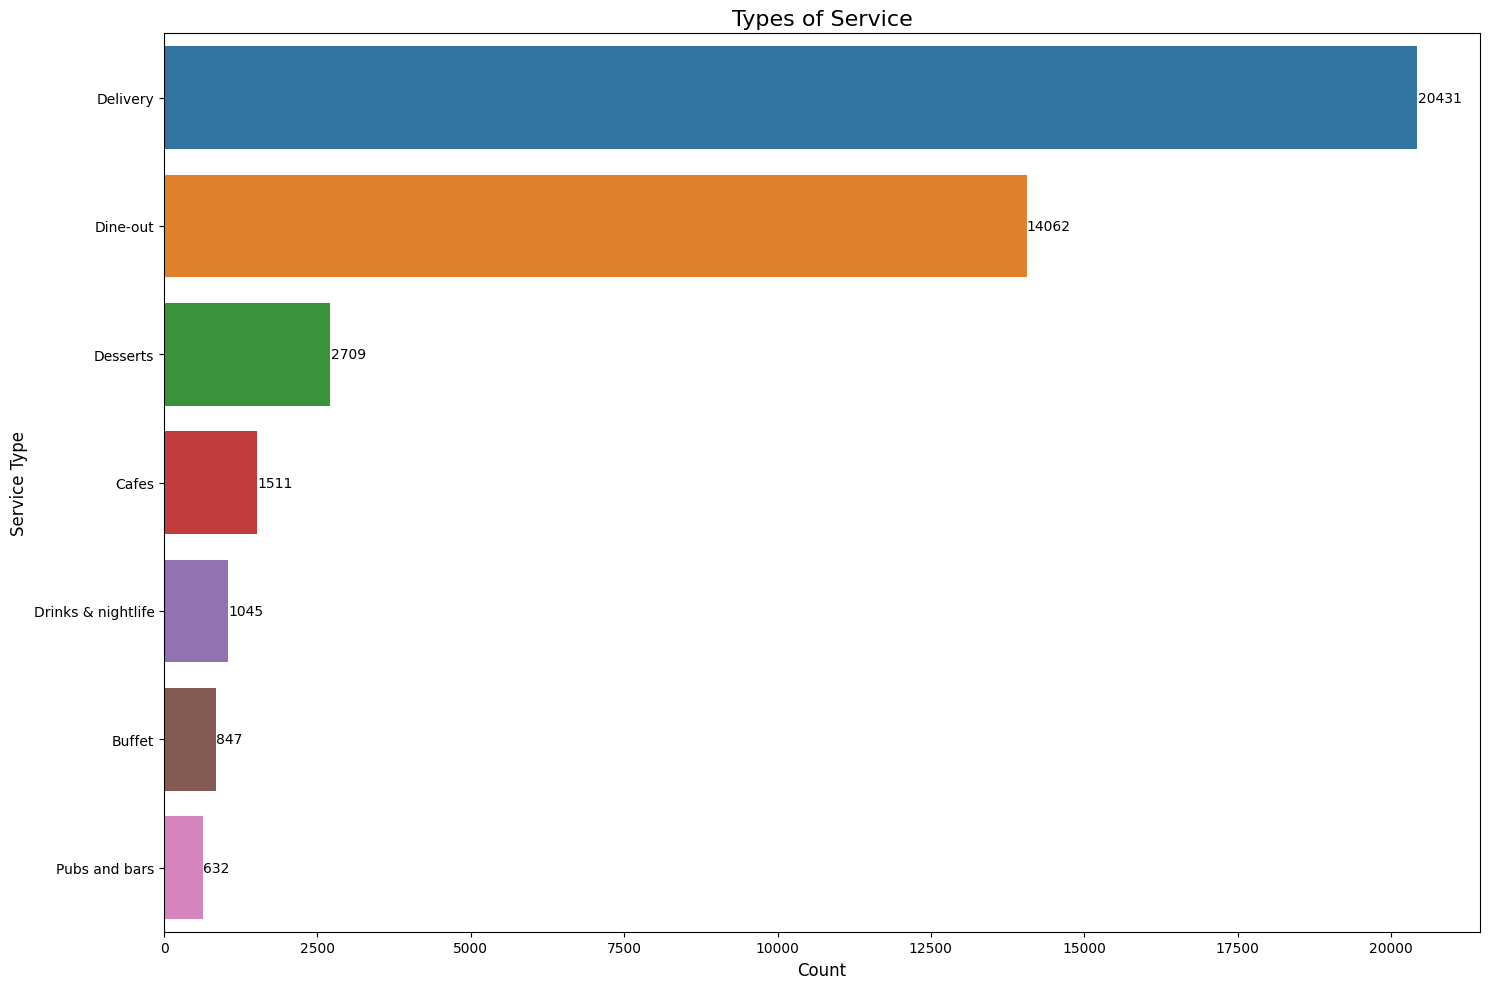

In [17]:
plt.figure(figsize=(15, 10))

ax = sns.countplot(data=zomato, y='type', order=zomato['type'].value_counts().index)

plt.title('Types of Service', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Service Type', fontsize=12)

# Add count labels
for i, v in enumerate(zomato['type'].value_counts()):
    ax.text(v + 3, i, str(v), va='center')

plt.tight_layout()
plt.show()

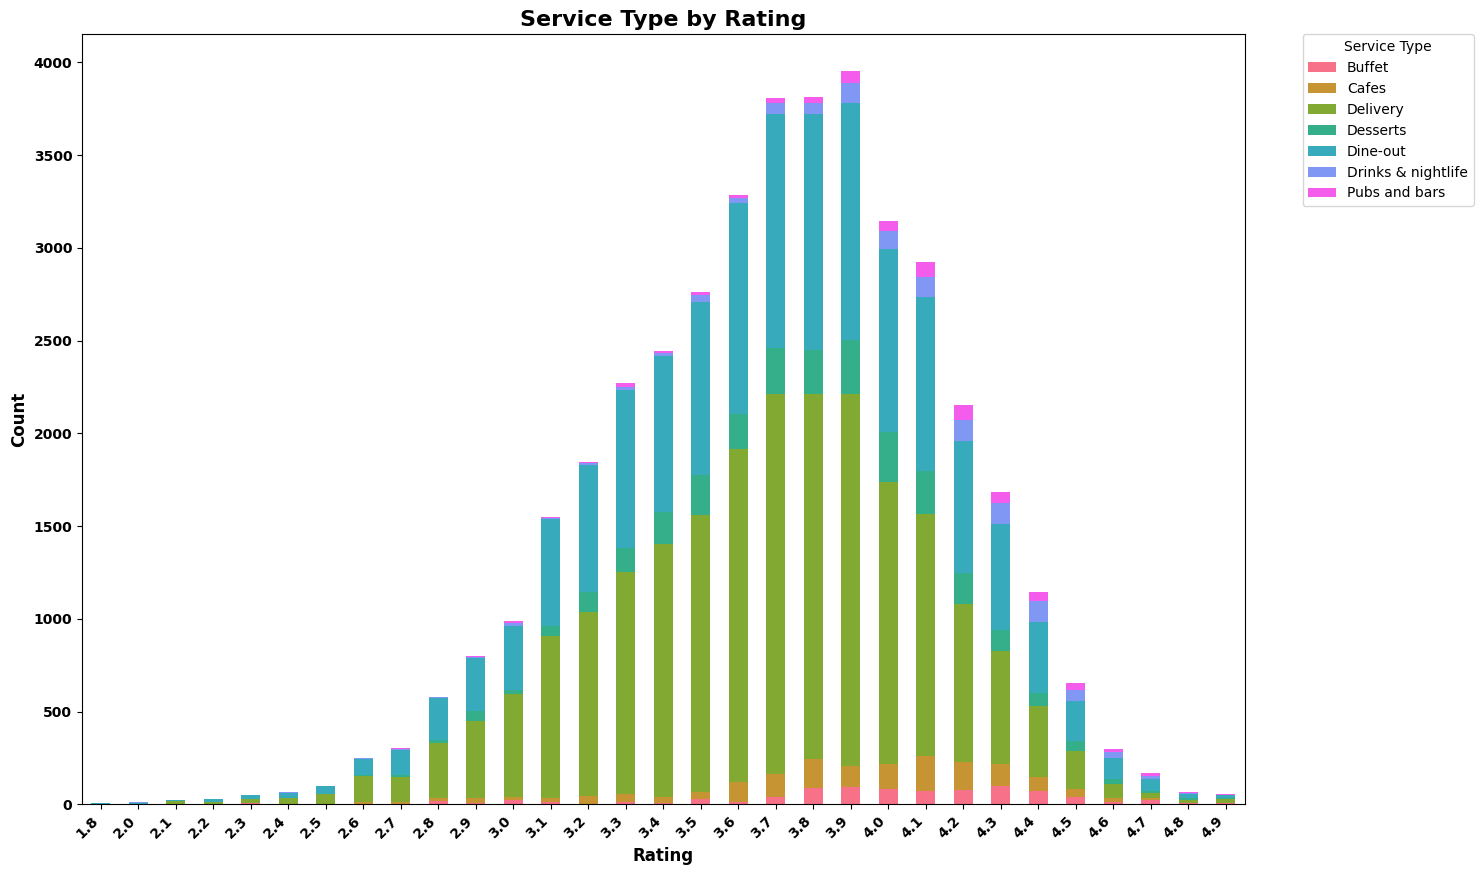

In [19]:
# Create the cross-tabulation
type_plt = pd.crosstab(zomato['rate'], zomato['type'])

# Set up the plot
fig, ax = plt.subplots(figsize=(15, 10))
colors = sns.color_palette("husl", n_colors=len(type_plt.columns))

# Create the stacked bar plot
type_plt.plot(kind='bar', stacked=True, color=colors,ax=ax)

# Customize the plot
plt.title('Service Type by Rating', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xlabel('Rating', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Add a legend
plt.legend(title='Service Type', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# show
plt.show()

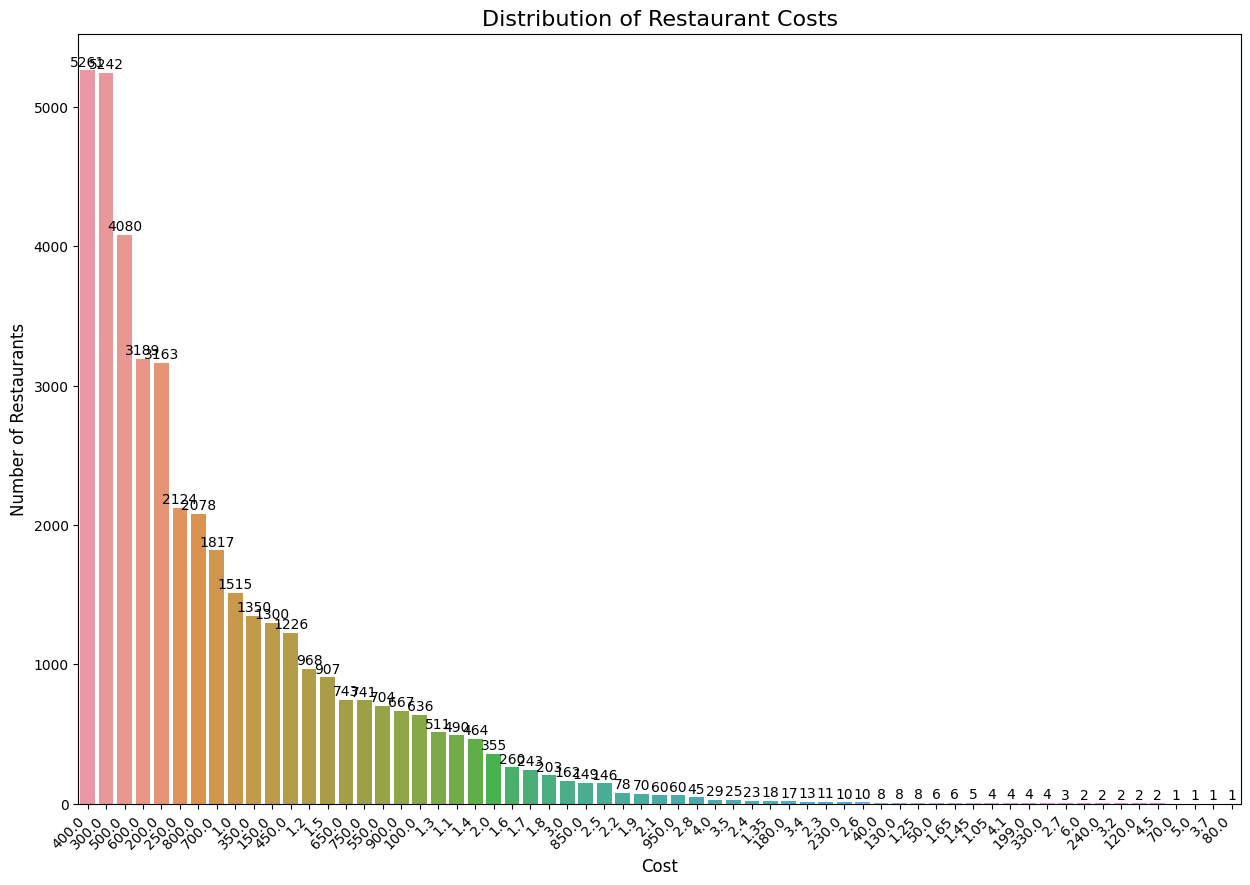

In [20]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Create the count plot
ax = sns.countplot(data=zomato, x='cost', order=zomato['cost'].value_counts().index)

# Customize the plot
plt.title('Distribution of Restaurant Costs', fontsize=16)
plt.xlabel('Cost', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add count labels on top of each bar
for i, v in enumerate(zomato['cost'].value_counts()):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')

plt.show()

/tmp/ipykernel_36/2295930724.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


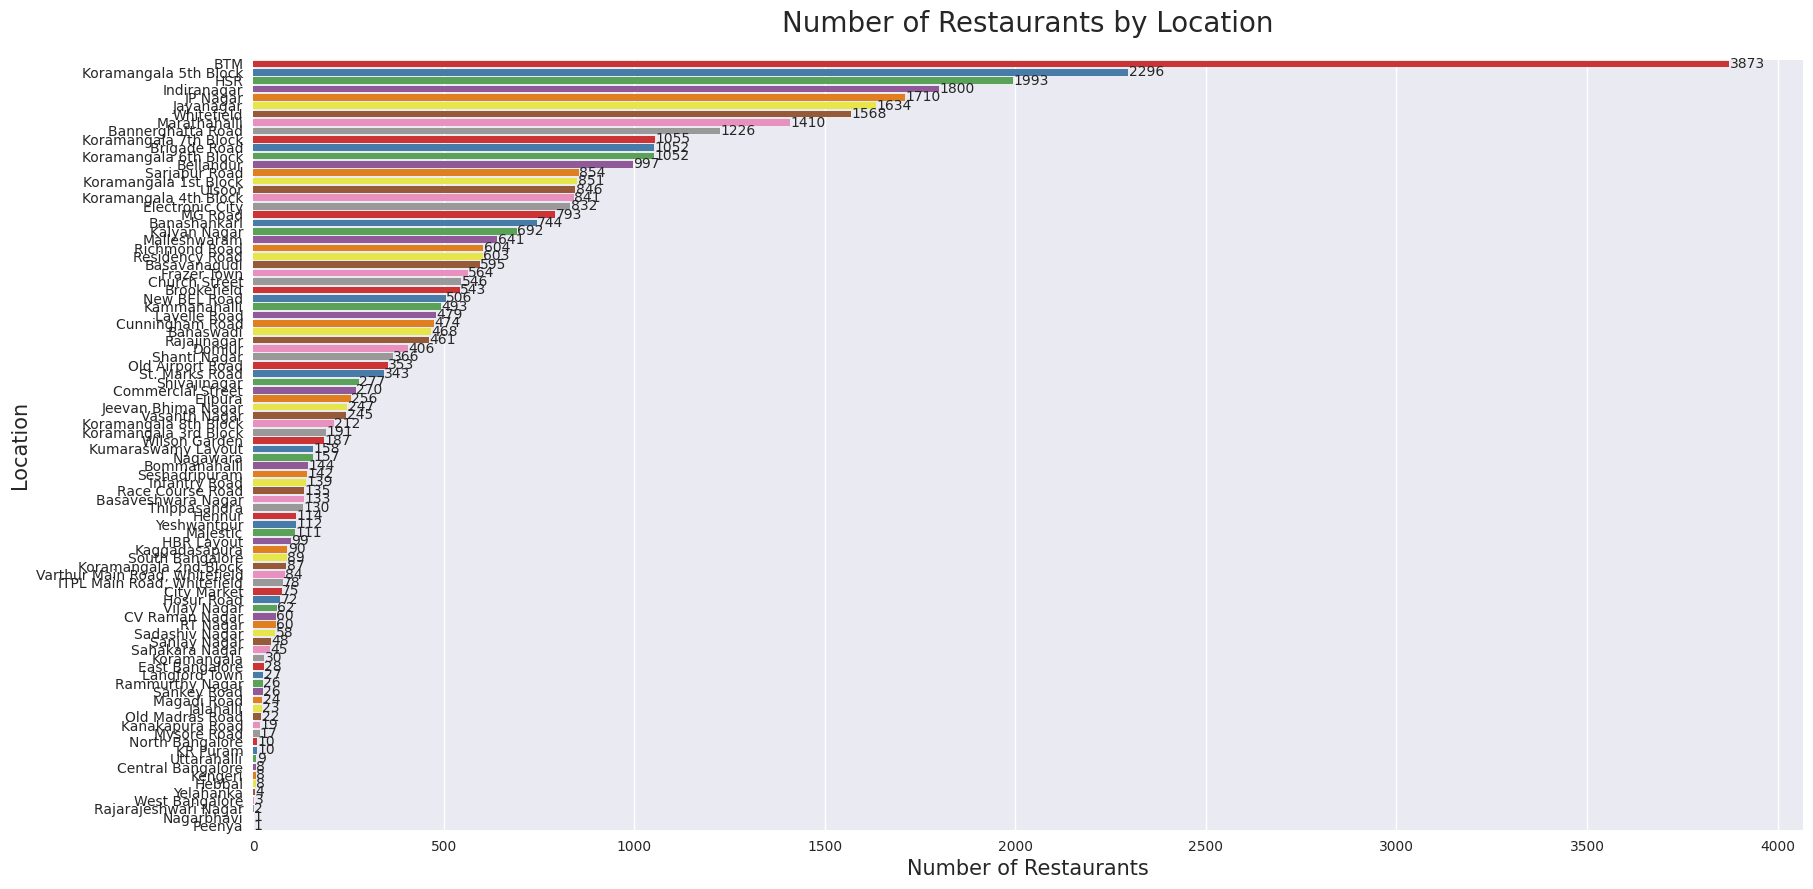

In [22]:
# Set the style and figure size
plt.style.use('seaborn')
plt.figure(figsize=(20, 10))

# Create the count plot
ax = sns.countplot(data=zomato, 
                   y="location",  
                   order=zomato['location'].value_counts().index,  # Sort by frequency
                   palette="Set1")

# Customize the plot
plt.title('Number of Restaurants by Location', fontsize=20, pad=20)
plt.xlabel('Number of Restaurants', fontsize=15)
plt.ylabel('Location', fontsize=15)

# Add count labels
for i, v in enumerate(zomato['location'].value_counts()):
    ax.text(v + 1, i, str(v), va='center')

plt.show()

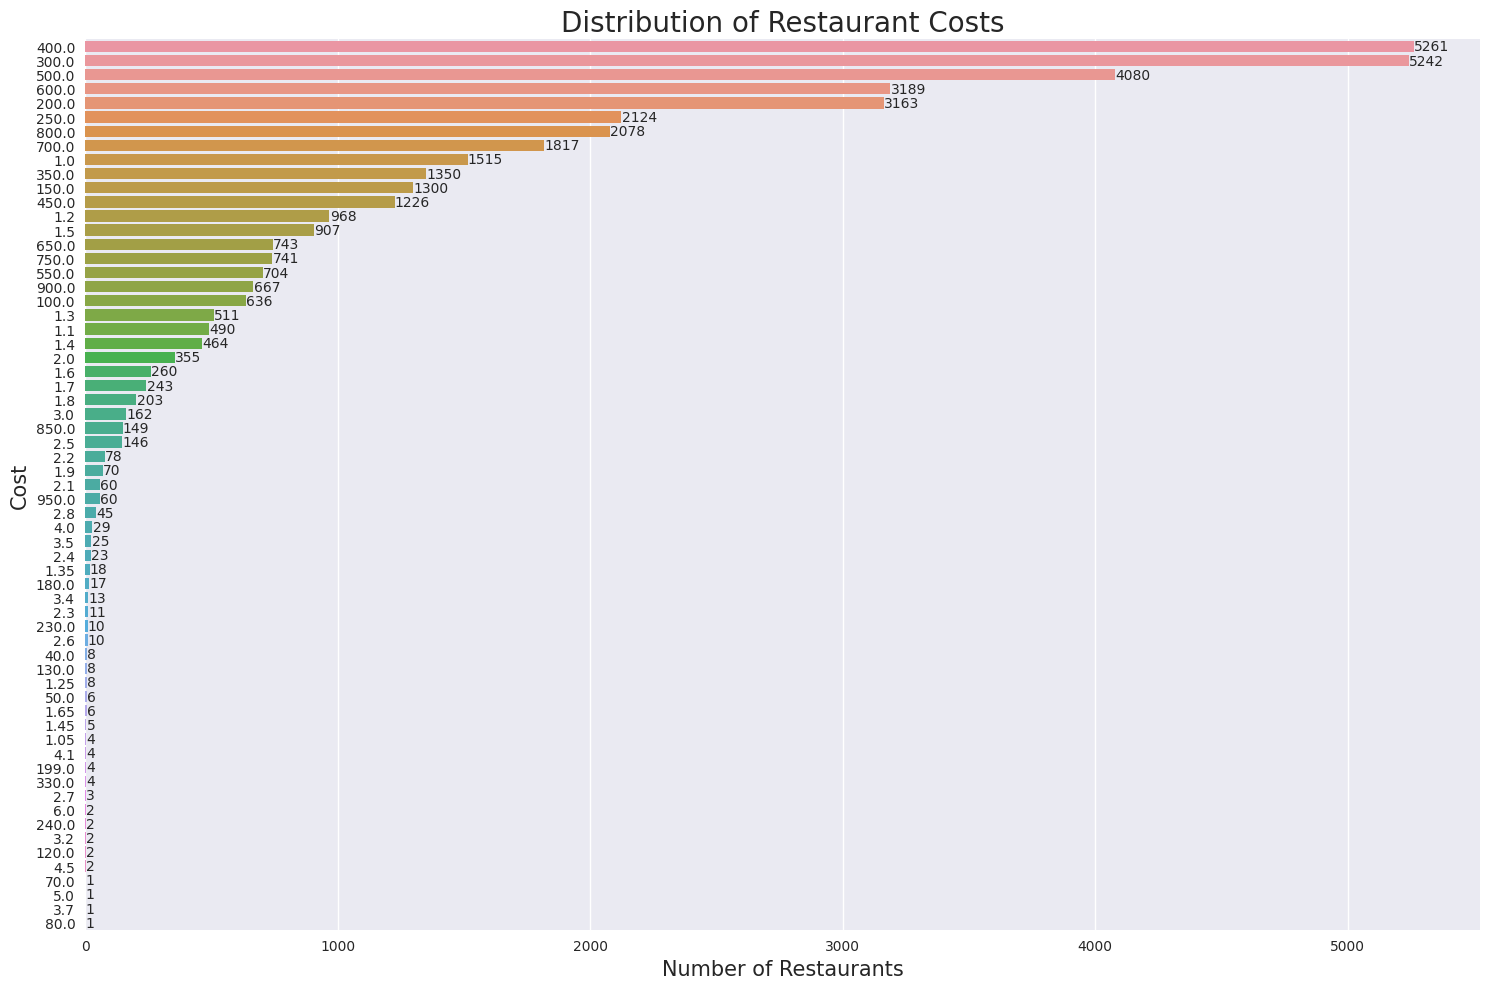

In [23]:
plt.figure(figsize=(15, 10))

# Create the count plot
ax = sns.countplot(data=zomato, 
                   y='cost',  # Changed to y for horizontal bars
                   order=zomato['cost'].value_counts().index)  # Sort by frequency

# Customize the plot
plt.title('Distribution of Restaurant Costs', fontsize=20)
plt.xlabel('Number of Restaurants', fontsize=15)
plt.ylabel('Cost', fontsize=15)

# Add count labels
for i, v in enumerate(zomato['cost'].value_counts()):
    ax.text(v + 1, i, str(v), va='center')

# Adjust layout and save
plt.tight_layout()
plt.savefig('Cost_of_Restaurant.png', dpi=300, bbox_inches='tight')
plt.show()

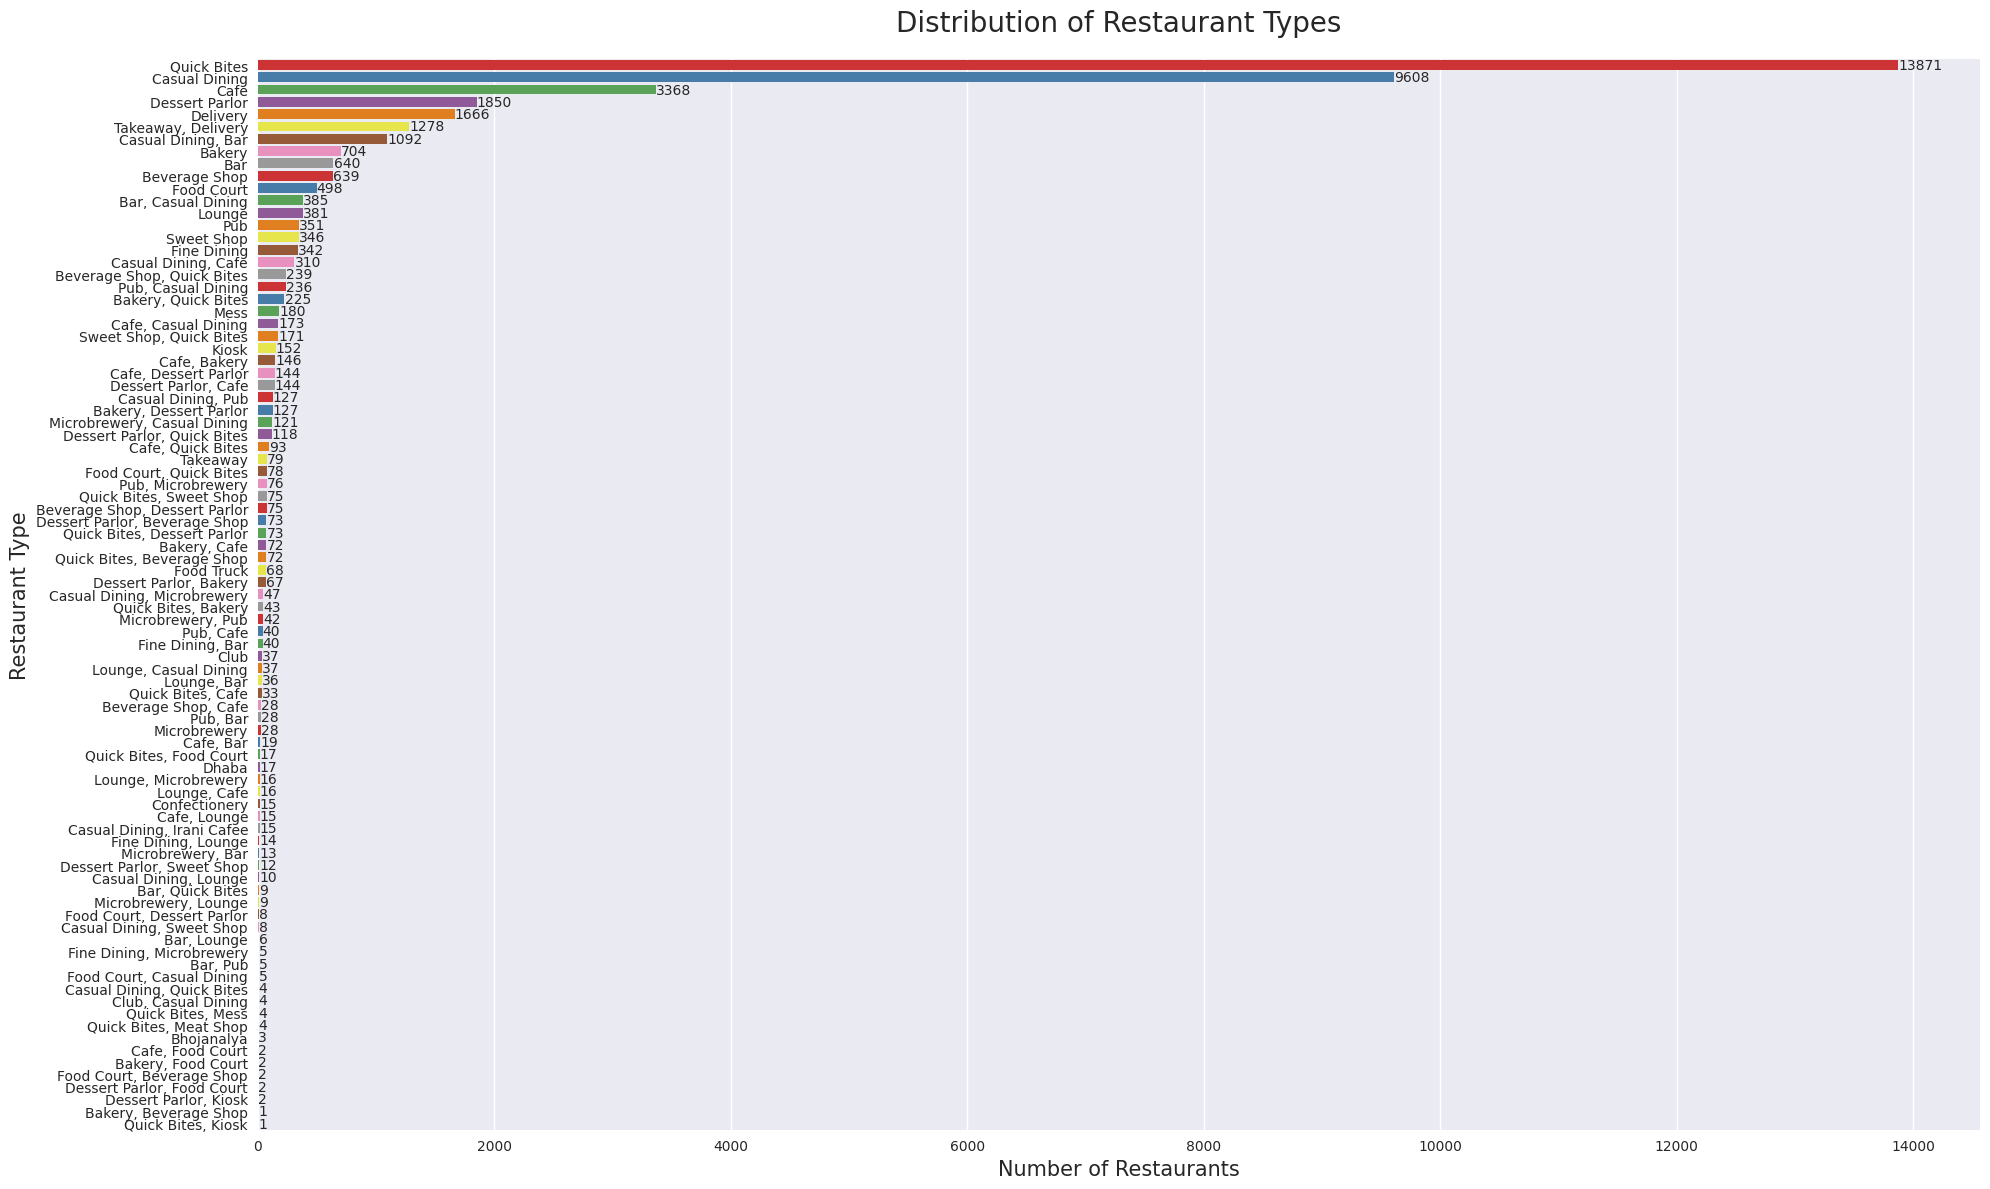

In [25]:
plt.figure(figsize=(20, 12))

# Create the count plot
ax = sns.countplot(data=zomato, 
                   y="rest_type",  # Changed to y for horizontal bars
                   order=zomato['rest_type'].value_counts().index,  # Sort by frequency
                   palette="Set1")

# Customize the plot
plt.title('Distribution of Restaurant Types', fontsize=20, pad=20)
plt.xlabel('Number of Restaurants', fontsize=15)
plt.ylabel('Restaurant Type', fontsize=15)

# Add count labels
for i, v in enumerate(zomato['rest_type'].value_counts()):
    ax.text(v + 1, i, str(v), va='center')

# Adjust layout and save
plt.tight_layout()
plt.savefig("Restaurant_Types.png", dpi=300, bbox_inches='tight')
plt.show()

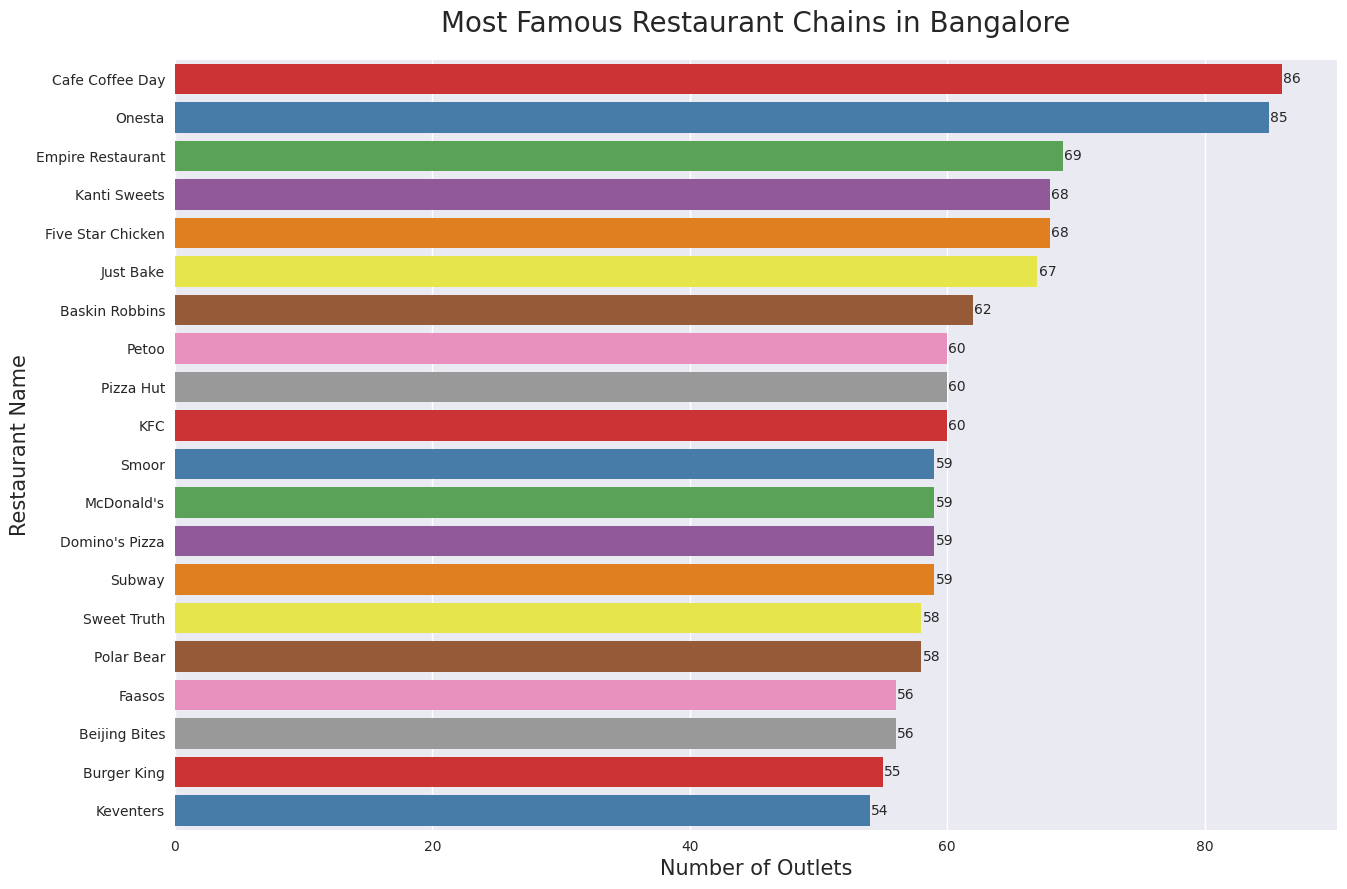

In [26]:
plt.figure(figsize=(15, 10))  # Increased height for better readability

# Get the 20 most common restaurant names
chains = zomato['name'].value_counts().nlargest(20)

# Create the bar plot
ax = sns.barplot(x=chains.values, y=chains.index, palette='Set1')

# Customize the plot
plt.title("Most Famous Restaurant Chains in Bangalore", size=20, pad=20)
plt.xlabel("Number of Outlets", size=15)
plt.ylabel("Restaurant Name", size=15)  # Added y-label

# Add value labels to the bars
for i, v in enumerate(chains.values):
    ax.text(v + 0.1, i, str(v), va='center')

plt.show()